
# ASSIGNED Boundary layers in fluid mechanics



When a plate is moved in a fluid at constant velocity, it causes the fluid to start moving with it. The velocity of the fluid changes with position away from the plate, and with time.

In this diagram, the plate is moving in the $x$ direction at a velocity of $U$. The velocity field at some time later is shown by the arrows in the middle.

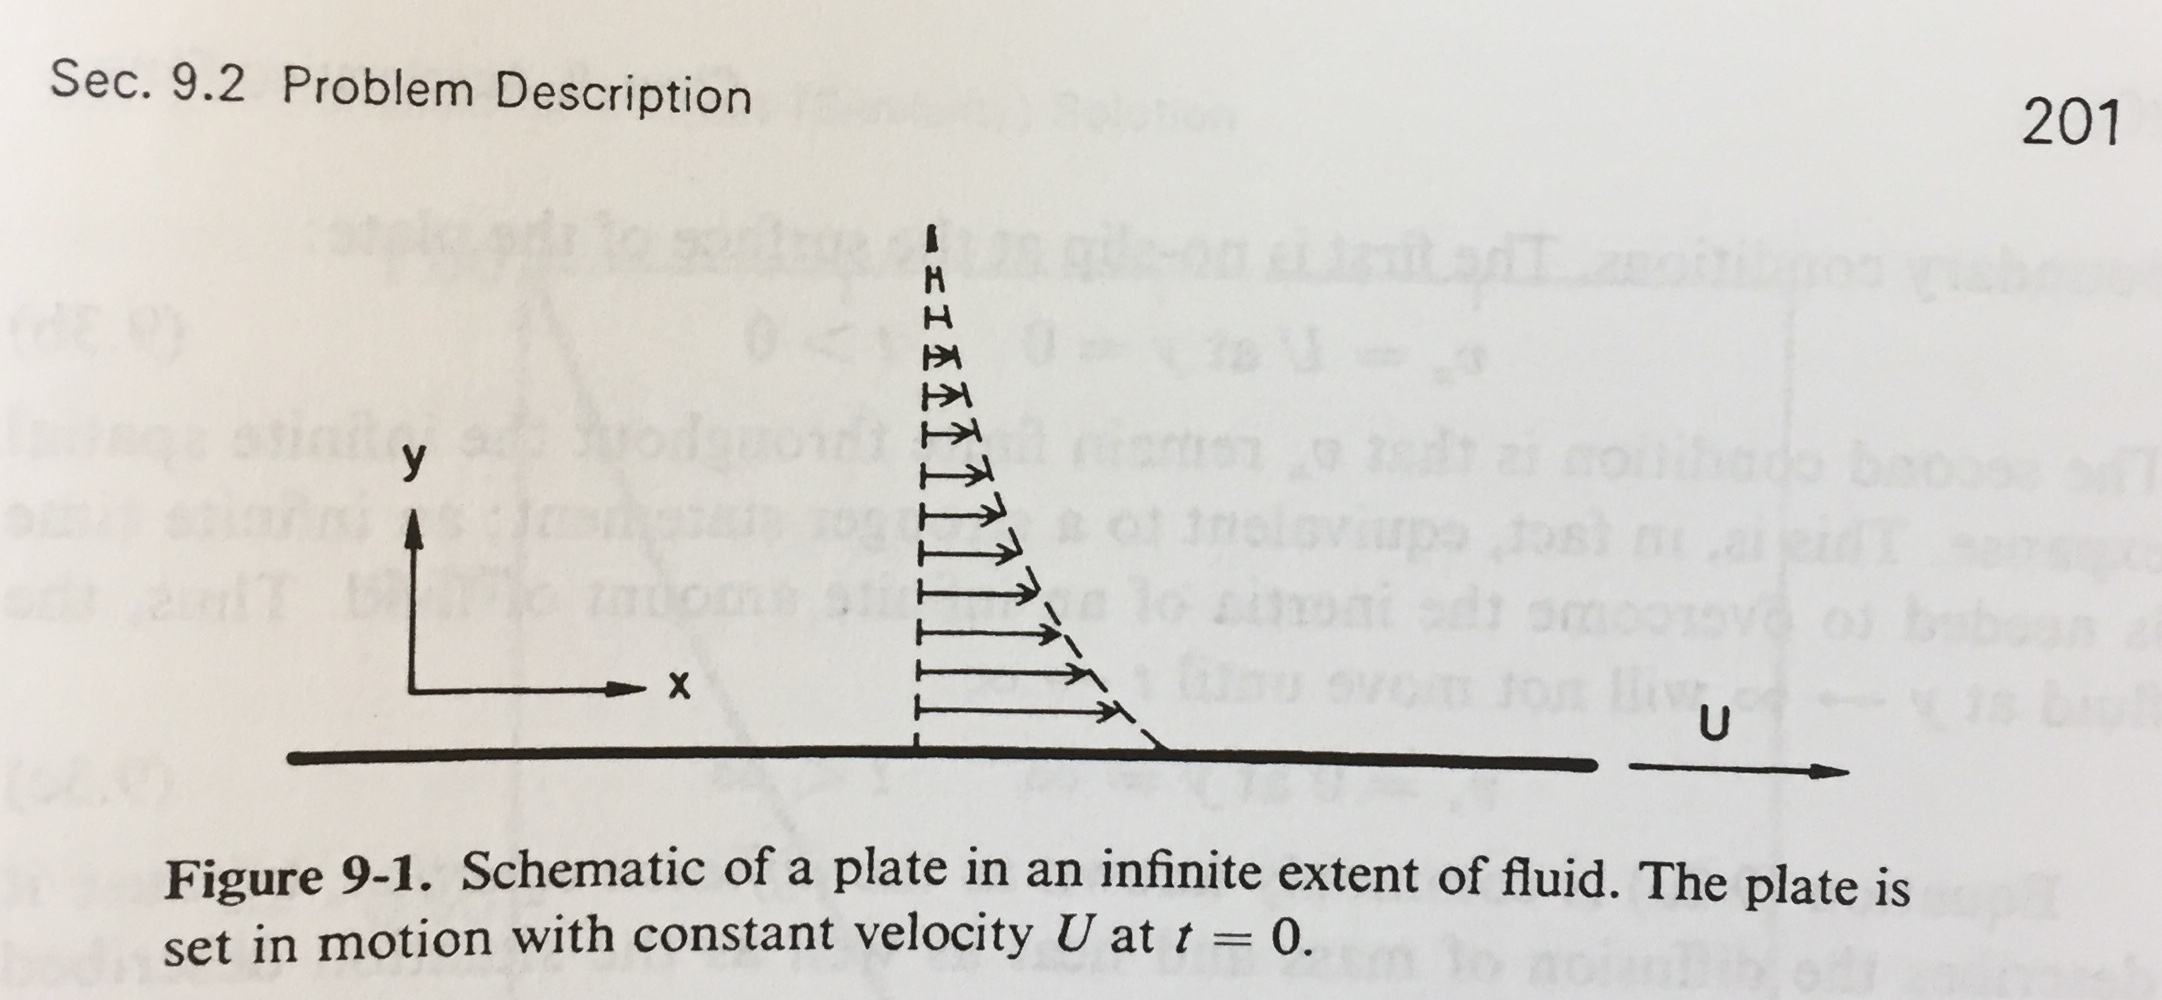

The velocity in the $x$ direction is given by this solution to the Navier Stokes equation for this problem:

$v_x(y, t) = U[1 - erf(\frac{y}{\sqrt{4 \eta t / \rho}})]$

The error function (erf) is defined as $erf(\zeta) = \sqrt{4 / \pi} \int_0^\zeta e^{-\xi^2} d\xi$.




## Plot the velocity profile



Make a plot of $v_x/U$ as a function of the combined variable $z = \frac{y}{\sqrt{4 \eta t / \rho}}$ over the range of z=0 to z=2. Use `scipy.integrate.quad` to evaluate the error function.



Provide an interpretation of what happens near $z=2$, considering that $z$ is a function of both time and distance from the plate.




### solution



(0, 1)

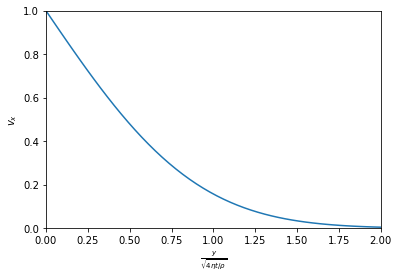

In [1]:
import numpy as np
from scipy.integrate import quad

z = np.linspace(0, 2)
vx = np.zeros(z.shape)

def integrand(x):
    return  np.sqrt(4 / np.pi) * np.exp(-x**2)

for i, _z in enumerate(z):
    erfz, _ = quad(integrand, 0, _z)
    vx[i] = 1 - erfz

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(z, vx)
plt.xlabel(r'$\frac{y}{\sqrt{4 \eta t / \rho}}$')
# Note: the string above has an r in front of it which indicates it is a "raw"
# string. Some of the characters, e.g. \r are special escaped characters like
# line return, and we do not want them interpreted that way. raw strings ignore
# these special escaped characters.
plt.ylabel('$v_x$')
plt.xlim([0, 2])
plt.ylim([0, 1])

The interpretation near $z=2$ is that the velocity there is practically zero. At any given time, you can estimate the thickness of moving fluid, which is often called the boundary layer. This thickness grows with time, specifically with the square root of time.




## Repeat the calculation using the special erf function in scipy.special.erf



Verify the solution is equivalent to the previous one.




### solution



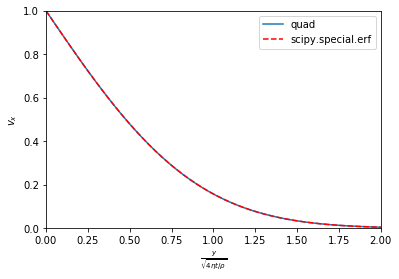

In [1]:
from scipy.special import erf

vx_2 = 1 - erf(z)

plt.plot(z, vx, label='quad')
plt.plot(z, vx_2, 'r--', label='scipy.special.erf')
plt.xlabel(r'$\frac{y}{\sqrt{4 \eta t / \rho}}$')
plt.ylabel('$v_x$')
plt.xlim([0, 2])
plt.ylim([0, 1])
plt.legend()

These are visually indistinguishable.



## General Comments

For the last graph, many of you just plotted only single data set. Such the graph does not tell differences between two data sets. You need to plot two data sets on the same graph to compare them.

## Miscellaneous notes

Some of you use math.sqrt instead of numpy.sqrt.

The difference between both sqrt is numpy.sqrt works on arrays and numbers but math.sqrt not.

In [7]:
import numpy as np

x = [0, 1, 2, 3]
np.sqrt(x)


array([0.        , 1.        , 1.41421356, 1.73205081])